<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup



fonte = BeautifulSoup(open('./estados-bruto.xml', mode='r', encoding='utf8'), 'lxml')



/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados
import pandas as pd

# continue o codigo aqui
estados = [estado.text for estado in fonte.find_all("nome")]
siglas = [estado.text for estado in fonte.find_all("sigla")]
regioes = [estado.text for estado in fonte.find_all("regiao")]

estados_df = pd.DataFrame({"Estado": estados, "Sigla": siglas, "Regiao": regioes})

In [ ]:
estados_df.head()

,Estado,Sigla,Regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;



# continue o codigo aqui

estados_df.to_csv("estados-limpos.csv", sep=";", index=False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
from posixpath import sep
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = pd.read_csv("./cidades-bruto.csv")

fonte_df = pd.DataFrame(NOME_ARQUIVO_FONTE)

In [ ]:
# visualize os resultados

fonte_df.head()

# continue o codigo aqui

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [ ]:
# manipule os dados

# continue o codigo aqui

fonte_2010_df = fonte_df[fonte_df["Censo"]==2010]
cidades_df = fonte_2010_df[['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]

In [ ]:
cidades_df.head()

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

cidades_df.to_csv(NOME_ARQUIVO_DESTINO, sep=";", encoding="utf8", index=False)

In [ ]:
cidades_df.shape

(5555, 5)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3
estados_df.rename(columns={"Estado": "UF"}, inplace=True)


cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "SAO PAULO" if uf == "SÃO PAULO" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "PIAUÍ" if uf == "PIAUI" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "GOIÁS" if uf == "GOIAS" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "PARÁ" if uf == "PARA" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "PARAÍBA" if uf == "PARAIBA" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "CEARÁ" if uf == "CEARA" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "PARANÁ" if uf == "PARANA" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "RODÔNIA" if uf == "RONDINIA" else uf )
cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "AMAPÁ" if uf == "AMAPA" else uf )

brasil_df = pd.merge(left=estados_df, right=cidades_df, on= "UF", how="right")
brasil_df.rename(columns={"nome": "Cidade"}, inplace=True)

brasil_df.to_csv("brasil.csv", sep=";", encoding="utf8", index=False)




<ipython-input-12-ffc0dbc19ba8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "SAO PAULO" if uf == "SÃO PAULO" else uf )
<ipython-input-12-ffc0dbc19ba8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_df["UF"] = cidades_df["UF"].apply(lambda uf: "PIAUÍ" if uf == "PIAUI" else uf )
<ipython-input-12-ffc0dbc19ba8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

brasil_df = pd.read_csv("/content/brasil.csv", encoding="utf8", sep=";")

In [ ]:
brasil_df.shape

(5555, 7)

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta

brasil_df.nlargest(10, 'Pop_est_2009')

,UF,Sigla,Regiao,Cidade,PIB,Pop_est_2009,PIB_percapita
4921,SAO PAULO,SP,SUDESTE,São Paulo,389317152.0,11037593,35271.929688
785,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,175739344.0,6186710,28405.949219
519,BAHIA,BA,NORDESTE,Salvador,32824228.0,2998056,10948.500000
3070,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasília,131487264.0,2606885,50438.460938
4523,CEARÁ,NaN,NaN,Fortaleza,31789186.0,2505552,12687.500000
4871,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,44595204.0,2452617,18182.699219
1812,PARANÁ,NaN,NaN,Curitiba,45762420.0,1851215,24720.210938
333,AMAZONAS,AM,NORTE,Manaus,40486108.0,1738641,23286.060547
3542,PERNAMBUCO,PE,NORDESTE,Recife,24835340.0,1561659,15903.179688
5219,PARÁ,NaN,NaN,Belém,16526989.0,1437600,11496.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta

menores_pib_nordest = brasil_df[brasil_df['Regiao'] == 'NORDESTE'].nsmallest(10, 'PIB')

menores_pib_nordest

,UF,Sigla,Regiao,Cidade,PIB,Pop_est_2009,PIB_percapita
203,RIO GRANDE DO NORTE,RN,NORDESTE,Viçosa,8834.245117,1856,4759.830078
5154,RIO GRANDE DO NORTE,RN,NORDESTE,João Dias,11670.412109,2824,4132.580078
1728,RIO GRANDE DO NORTE,RN,NORDESTE,Monte das Gameleiras,11909.322266,2449,4862.930176
3130,RIO GRANDE DO NORTE,RN,NORDESTE,Taboleiro Grande,12153.434570,2380,5106.490234
153,RIO GRANDE DO NORTE,RN,NORDESTE,Pedra Preta,12639.967773,2718,4650.470215
3784,RIO GRANDE DO NORTE,RN,NORDESTE,Jardim de Angicos,12700.251953,2598,4888.470215
204,RIO GRANDE DO NORTE,RN,NORDESTE,Fernando Pedroza,12757.658203,2994,4261.069824
13,SERGIPE,SE,NORDESTE,Amparo de São Francisco,12769.733398,2268,5630.390137
1640,RIO GRANDE DO NORTE,RN,NORDESTE,Ipueira,13287.047852,2115,6282.290039
258,RIO GRANDE DO NORTE,RN,NORDESTE,Riacho da Cruz,13750.829102,3165,4344.649902


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta

maiores_pib_sp = brasil_df[brasil_df['UF'] == 'SAO PAULO'].nlargest(10, 'PIB')

maiores_pib_sp

,UF,Sigla,Regiao,Cidade,PIB,Pop_est_2009,PIB_percapita
4921,SAO PAULO,SP,SUDESTE,São Paulo,389317152.0,11037593,35271.929688
4450,SAO PAULO,SP,SUDESTE,Guarulhos,32473828.0,1299283,24993.650391
5425,SAO PAULO,SP,SUDESTE,Campinas,31654720.0,1064669,29731.980469
3426,SAO PAULO,SP,SUDESTE,Osasco,31616452.0,718646,43994.468750
979,SAO PAULO,SP,SUDESTE,São Bernardo do Campo,28935768.0,810979,35680.050781
5456,SAO PAULO,SP,SUDESTE,Barueri,26908070.0,270173,99595.703125
576,SAO PAULO,SP,SUDESTE,Santos,22546134.0,417098,54054.761719
2509,SAO PAULO,SP,SUDESTE,São José dos Campos,22018042.0,615871,35751.058594
2704,SAO PAULO,SP,SUDESTE,Jundiaí,16585137.0,349929,47395.718750
1027,SAO PAULO,SP,SUDESTE,Santo André,14709603.0,673396,21843.910156


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
pib_sc = round(brasil_df[brasil_df['UF'] == 'SANTA CATARINA'].sum()["PIB"],2)

print(f"O PIB de Santa Catarina é: R$ {pib_sc}")

O PIB de Santa Catarina é: R$ 129806256.75


 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
pop_sul = brasil_df[brasil_df['Regiao'] == 'SUL'].sum()["Pop_est_2009"]

print(f"A popolução da região sul é: {pop_sul}")

A popolução da região sul é: 17032871


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
pib_mts_med = round(brasil_df[brasil_df['UF'] == 'MATO GROSSO DO SUL']["PIB"].mean(),2)

print(f"A média do PIB do MT do Sul é: R$ {pib_mts_med}")

A média do PIB do MT do Sul é: R$ 466257.61


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta

populacao_brasil = brasil_df["Pop_est_2009"].sum()

print(f"A popução do Brasil é: {populacao_brasil}")

A popução do Brasil é: 191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

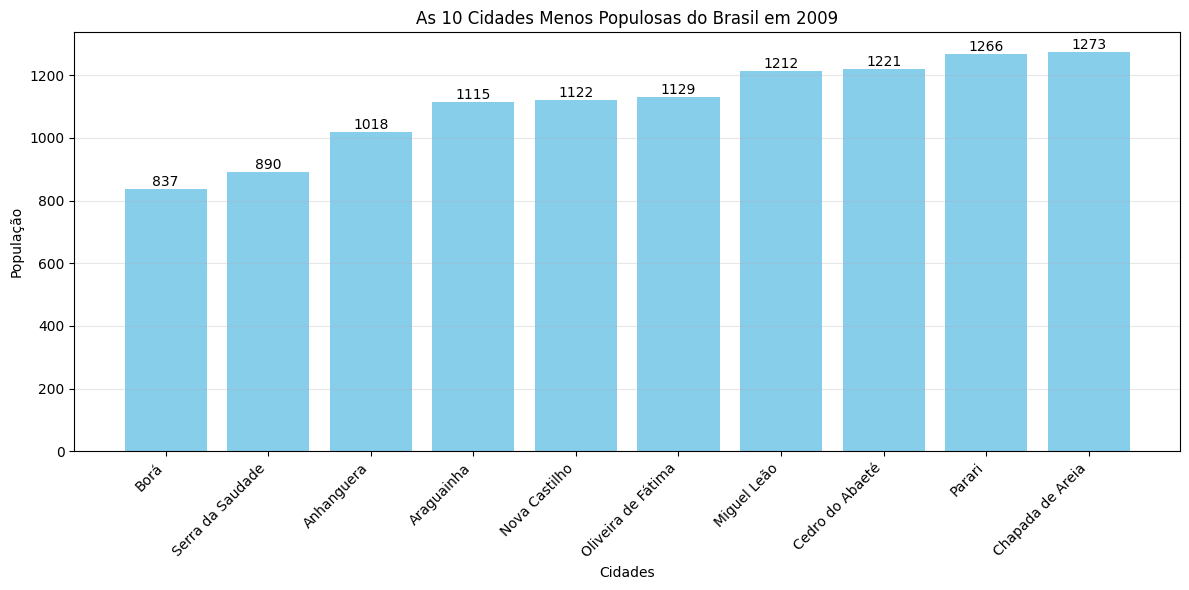

In [ ]:
# código para gerar a visualização
import matplotlib.pyplot as plt


cid_menos_pop_br = brasil_df.nsmallest(10, "Pop_est_2009")

plt.figure(figsize=(12, 6))
bars =plt.bar(cid_menos_pop_br["Cidade"], cid_menos_pop_br["Pop_est_2009"], color='skyblue')
plt.xlabel('Cidades')
plt.ylabel('População')
plt.title('As 10 Cidades Menos Populosas do Brasil em 2009')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.3)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [ ]:
regioes = brasil_df.groupby("Regiao")

In [ ]:
regioes = regioes["Pop_est_2009"].sum()


In [ ]:
type(regioes)

pandas.core.series.Series

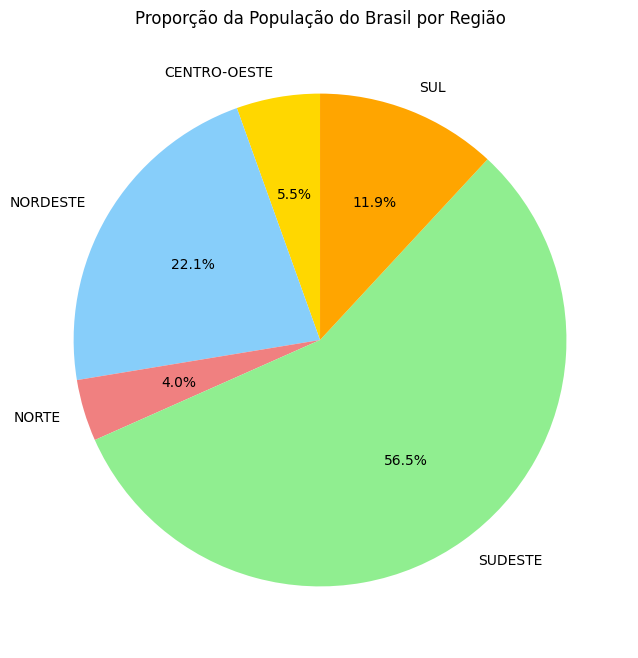

In [ ]:
# código para gerar a visualização




plt.figure(figsize=(8, 8))
plt.pie(regioes, labels=regioes.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Proporção da População do Brasil por Região')
plt.show()